# Autoencoders para compressão de imagens

# Autoencoder linear

## Importação das bibliotecas

In [1]:
# @title
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
import numpy as np
import matplotlib.pyplot as plt
tf.__version__

'2.19.0'

## Carregamento da base de dados

- Dataset: https://keras.io/api/datasets/mnist/

In [ ]:
# @title
from tensorflow.keras.datasets import mnist

In [ ]:
# @title
# CRIA-SE AS VARIAVEIS DE TREINAMENTO E TESTE COM OS DADOS DO "MNIST"
(X_treinamento, y_treinamento), (X_teste, y_teste) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
# @title
28 * 28

784

In [ ]:
# @title
X_treinamento.shape, y_treinamento.shape

((60000, 28, 28), (60000,))

In [ ]:
# @title
X_teste.shape, y_teste.shape

((10000, 28, 28), (10000,))

In [ ]:
# @title
X_treinamento[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

In [ ]:
# @title
y_treinamento[0]

np.uint8(5)

## Visualização das imagens

In [ ]:
# @title
np.random.randint(0, 60000)

53330

0


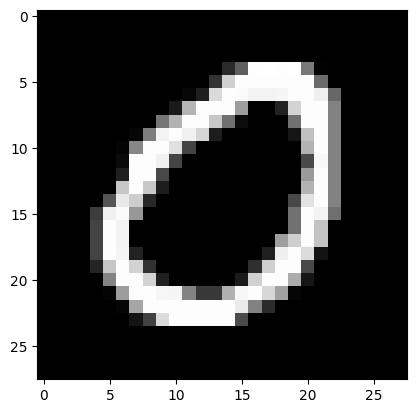

In [ ]:
# @title
i = np.random.randint(0, 60000)
print(y_treinamento[i])
plt.imshow(X_treinamento[i], cmap='gray');

In [ ]:
# @title
np.arange(0, 100)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

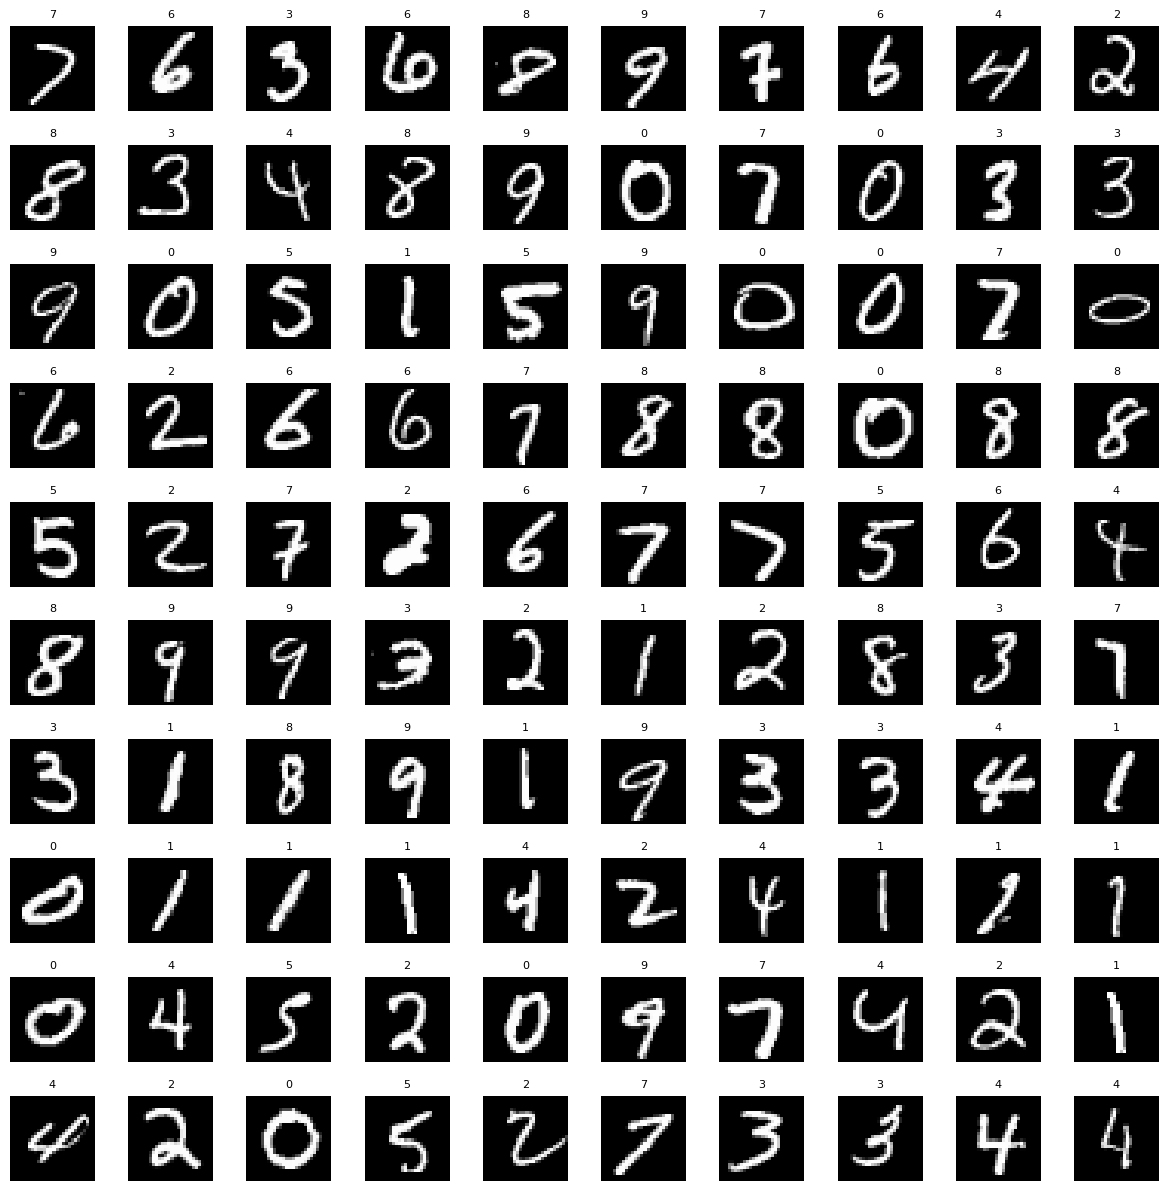

In [ ]:
# @title
largura = 10
altura = 10
figura, axes = plt.subplots(altura, largura, figsize=(15,15))
#print(axes.shape)
axes = axes.ravel() # (10,10) -> [100] # CONVERTE A FIGURA DO FORMATO DE MATRIZ PARA O FORMATO DE VETOR
#print(axes.shape)
for i in np.arange(0, 100):
  indice = np.random.randint(0, 60000)
  axes[i].imshow(X_treinamento[indice], cmap='gray') # VISUALIZAÇÃO DE 100 IMAGENS ALEATORIAS DOS NUMEROS
  axes[i].set_title(y_treinamento[indice], fontsize = 8) # TITULO PARA CADA UMA DAS IMAGENS, DE ACORDO COM O NUMERO MOSTRADO
  axes[i].axis('off') # REMOVE OS NUMEROS DOS EIXOS X E Y
plt.subplots_adjust(hspace=0.4)

## Pré-processamento das imagens

In [ ]:
# @title
X_treinamento[0].min(), X_treinamento[0].max() # VALOR MINIMO E MAXIMO DOS PIXELS DOS DADOS DE TREINAMENTO

(np.uint8(0), np.uint8(255))

In [ ]:
# @title
# NORMALIZAÇÃO DOS DADOS
X_treinamento = X_treinamento / 255
X_teste = X_teste / 255

In [ ]:
# @title
# VALORES NORMALIZADOS APÓS A DIVISÃO POR 255
X_treinamento[0].min(), X_treinamento[0].max()

(np.float64(0.0), np.float64(1.0))

In [ ]:
# @title
X_treinamento[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
# @title
X_treinamento.shape, X_teste.shape # AS IMAGENS AINDA ESTÃO EM FORMATO DE MATRIZ

((60000, 28, 28), (10000, 28, 28))

In [ ]:
# @title
28 * 28

784

Com os valores da linha de código: "X_treinamento.shape, X_teste.shape" | resultado: "((60000, 28, 28), (10000, 28, 28))", abaixo será feito a conversão para o formato de vetor, onde o primeiro parametro é a qtd de dados - 60000 - e o segundo parametro é a multiplicação dos pixels - 28 * 28 - resultando na conversão para vetor

In [ ]:
# @title
X_treinamento = X_treinamento.reshape(X_treinamento.shape[0], X_treinamento.shape[1] * X_treinamento.shape[2])
X_treinamento.shape

(60000, 784)

O mesmo é feito para a base de dados de teste - X_teste = X_teste.reshape(X_teste.shape[0], X_teste.shape[1] * X_teste.shape[2]) - convertendo também para vetor

In [ ]:
# @title
X_teste = X_teste.reshape(X_teste.shape[0], X_teste.shape[1] * X_teste.shape[2])
X_teste.shape

(10000, 784)

## Construção e treinamento do autoencoder linear

In [ ]:
# @title
# QTD DE DADOS NA CAMADA DE ENTRADA: 784
# 128 - 64 - 32 - 64 - 128 - 784

autoencoder = Sequential()

# 1º ETAPA: Codificação
autoencoder.add(Dense(units = 128, activation='relu', input_dim = 784)) # 1º CAMADA ESCONDIDA
autoencoder.add(Dense(units = 64, activation='relu')) # 2º CAMADA ESCONDIDA
autoencoder.add(Dense(units = 32, activation='relu')) # TEREMOS A IMAGEM CODIFICADA

# 2º ETAPA: Decodificação
autoencoder.add(Dense(units = 64, activation='relu'))
autoencoder.add(Dense(units = 128, activation='relu'))
autoencoder.add(Dense(units = 784, activation='sigmoid')) # CAMADA DE SAÍDA

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# @title
autoencoder.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 784)            │       101,136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 222,384 (868.69 KB)

 Trainable params: 222,384 (868.69 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# @title
# COMPILAÇÃO DA REDE NEURAL
autoencoder.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# @title
y_treinamento

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
# @title
# COMO A MESMA IMAGEM SERÁ A SAÍDA DA REDE NEURAL, A MESMA VARIÁVEL SERÁ ATRIBUÍDA NO FINAL
autoencoder.fit(X_treinamento, X_treinamento, epochs=50)

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.0107 - loss: 0.2093
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.0120 - loss: 0.1151
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0108 - loss: 0.1038
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.0130 - loss: 0.0996
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.0135 - loss: 0.0967
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0134 - loss: 0.0949
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0123 - loss: 0.0934
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0137 - loss: 0.0922
Epoch 9/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0129 - loss: 0.0910
Epoch 10/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0145 - loss: 0.0896
Epoch 11/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0146 - loss: 0.0887
Epoch 12/50
1875/1875 ━━━━━━━━

## Codificação das imagens

In [ ]:
# @title
autoencoder.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 784)            │       101,136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 667,154 (2.54 MB)

 Trainable params: 222,384 (868.69 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 444,770 (1.70 MB)

In [ ]:
# @title
autoencoder.get_layer('dense').input

<KerasTensor shape=(None, 784), dtype=float32, sparse=False, ragged=False, name=keras_tensor>

In [ ]:
# @title
autoencoder.get_layer('dense_2').output

<KerasTensor shape=(None, 32), dtype=float32, sparse=False, ragged=False, name=keras_tensor_6>

In [ ]:
# @title
# CONECTA AS DUAS CAMADAS PARA A CODIFICAÇÃO DAS IMAGENS
encoder = Model(inputs = autoencoder.get_layer('dense').input, outputs = autoencoder.get_layer('dense_2').output)

In [ ]:
# @title
encoder.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,816 (432.88 KB)

 Trainable params: 110,816 (432.88 KB)

 Non-trainable params: 0 (0.00 B)

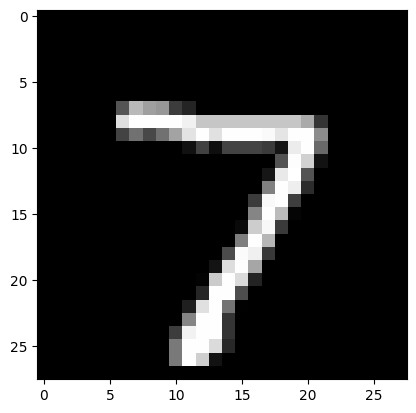

In [ ]:
# @title
# PASSA A IMAGEM COMO MATRIZ, POIS A ORIGINAL ESTÁ COMO VETOR
plt.imshow(X_teste[0].reshape(28,28), cmap='gray');

In [ ]:
# @title
X_teste[0].shape

(784,)

In [ ]:
# @title
# UMA IMAGEM APENAS, COM O TAMANHO DO VETOR DE 784
X_teste[0].reshape(1, -1).shape

(1, 784)

In [ ]:
# @title
# OS 784 PIXELS SÃO ENVIADOS PARA A CAMADA DE ENTRADA DO encoder, APENAS NA FASE DE CODIFICAÇÃO
imagem_codificada = encoder.predict(X_teste[0].reshape(1, -1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


In [ ]:
# @title
# IMAGEM CODIFICADA COM 32 VALORES NESSE MOMENTO DA CODIFICAÇÃO
imagem_codificada

array([[1.987475 , 1.0214231, 0.       , 3.5074565, 0.       , 5.5737557,
        4.490626 , 6.4302673, 6.7206483, 6.4069676, 0.       , 8.171411 ,
        6.324647 , 2.2516115, 4.214533 , 4.0653954, 0.       , 8.180333 ,
        4.8967123, 7.450401 , 3.4839294, 1.7416492, 1.0584157, 0.       ,
        3.590039 , 3.8952143, 8.251645 , 4.6551576, 3.902757 , 6.080836 ,
        3.6638522, 0.       ]], dtype=float32)

In [ ]:
# @title
imagem_codificada.shape

(1, 32)

In [ ]:
# @title
8 * 4

32

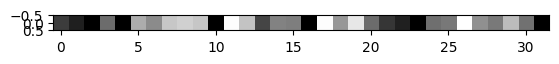

In [ ]:
# @title
# IMAGEM NA ESCALA DE VETOR
plt.imshow(imagem_codificada, cmap='gray');

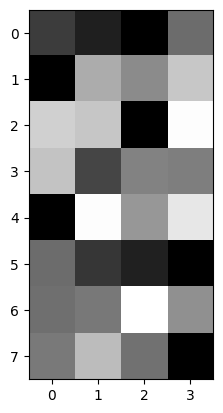

In [ ]:
# @title
# IMAGEM NA ESCALA DE MATRIZ COM ESCALAS DE 8 x 4
plt.imshow(imagem_codificada.reshape(8,4), cmap='gray');

## Decodificação das imagens

In [ ]:
# @title
autoencoder.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 784)            │       101,136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 667,154 (2.54 MB)

 Trainable params: 222,384 (868.69 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 444,770 (1.70 MB)

Como possui apenas uma camada de entrada dos valores, para a codificação das imagens, a parte de decodificação não tem, possuindo apenas uma camada densa. Sendo assim, será necessário a criação da camada de entrada para DECODIFICAR as imagens CODIFICADAS

In [ ]:
# @title
# CRIAÇÃO DA CAMADA DE ENTRADA DOS VALORES, PARA A DECODIFICAÇÃO DAS IMAGENS
input_layer_decoder = Input(shape=(32,))

In [ ]:
# @title
# AS VARIÁVEIS "decoder_layer.." BUSCA AS CAMADAS DAS IMAGENS CODIFICADAS
decoder_layer1 = autoencoder.layers[3] # O NUMERO 3 SIGNIFICA A POSIÇÃO DA CAMADA "dense_3"
decoder_layer2 = autoencoder.layers[4] # O NUMERO 4 SIGNIFICA A POSIÇÃO DA CAMADA "dense_4"
decoder_layer3 = autoencoder.layers[5] # O NUMERO 5 SIGNIFICA A POSIÇÃO DA CAMADA "dense_5"

Precisa agora juntar as cadas 'decoder_layer1' 'decoder_layer2' e 'decoder_layer3' com a camada de entrada, ficará assim:

Camada de entrada (input_layer_decoder), se juntará com a 3º camada (decoder_layer1);

3º camada (decoder_layer1), se juntará com a 4º camada (decoder_layer2);

4º camada (decoder_layer2), se juntará com a 5º camada (decoder_layer3);

Abaixo a linha de código:

In [ ]:
# @title
# JUNÇÃO DAS CAMADAS DECODERS NA VARIÁVEL "decoder"
decoder = Model(inputs = input_layer_decoder,
                outputs = decoder_layer3(decoder_layer2(decoder_layer1(input_layer_decoder))))

In [ ]:
# @title
# CAMADAS PARA A DECODIFICAÇÃO DA IMAGEM
decoder.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 784)            │       101,136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,568 (435.81 KB)

 Trainable params: 111,568 (435.81 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# @title
# ENVIA A IMAGEM CODIFICADA ANTERIORMENTE, PARA A DECODIFICAÇÃO
imagem_decodificada = decoder.predict(imagem_codificada)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


In [ ]:
# @title
imagem_decodificada.shape

(1, 784)

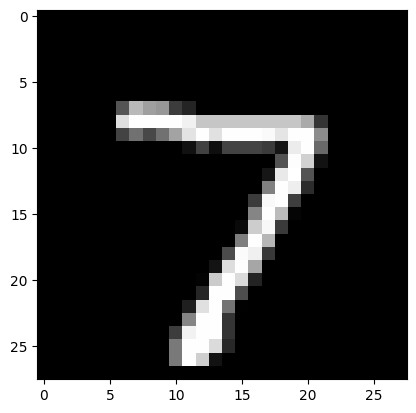

In [ ]:
# @title
# IMAGEM ORIGINAL
plt.imshow(X_teste[0].reshape(28,28), cmap='gray');

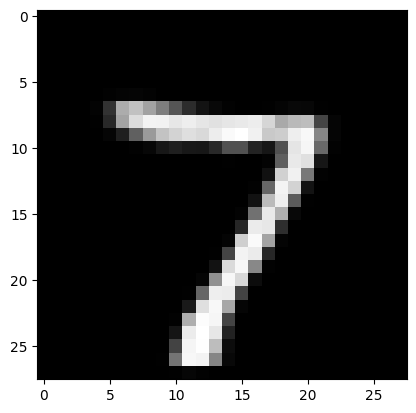

In [ ]:
# @title
# IMAGEM DECODIFICADA APÓS O PROCESSO
plt.imshow(imagem_decodificada.reshape(28,28), cmap='gray');

## Codificação e decodificação das imagens de teste

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


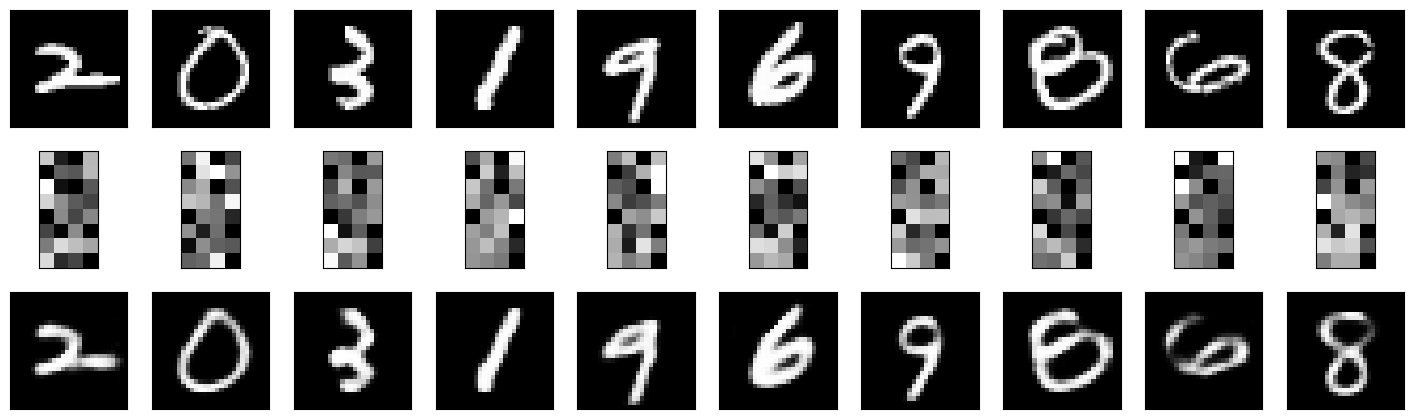

In [ ]:
# @title
numero_imagens = 10
imagens_teste = np.random.randint(0, 10000, size = numero_imagens)
#print(imagens_teste)
plt.figure(figsize=(18,18))
for i, imagem_indice in enumerate(imagens_teste):
  #print(i, imagem_indice)

  # Mostra as imagens originais
  ax = plt.subplot(10,10, i + 1) # CRIAÇÃO DOS SUBGRÁFICOS
  plt.imshow(X_teste[imagem_indice].reshape(28,28), cmap='gray') # DIMENSIONA AS 10 IMAGENS NA ESCALA DE 28 x 28
  plt.xticks(()) # REMOVE OS NUMEROS NO EIXO X
  plt.yticks(()) # REMOVE OS NUMEROS NO EIXO Y

  # Mostra as imagens codificadas
  ax = plt.subplot(10,10, i + 1 + numero_imagens)
  imagem_codificada = encoder.predict(X_teste[imagem_indice].reshape(1,-1))
  plt.imshow(imagem_codificada.reshape(8,4), cmap='gray')
  plt.xticks(())
  plt.yticks(())

  # Mostra as imagens decodificadas
  ax = plt.subplot(10,10, i + 1 + numero_imagens * 2)
  plt.imshow(decoder.predict(imagem_codificada).reshape(28,28), cmap='gray') # COMO A IMAGEM ESTARÁ NO TAMANHO DE VETOR - 784 PIXELS - SERÁ NECESSÁRIO REDIMENSIONAR PARA O TAMANHO DE 28 x 28
  plt.xticks(())
  plt.yticks(())

## ********* As imagens decodificadas não existem no banco de dados das imagens originais, são apenas a geração a partir das imagens codificadas *********

# Autoencoder convolucional

## Importação das bibliotecas

In [2]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Reshape, Flatten

# EXPLICAÇÃO DAS BIBLIOTECAS

# UpSampling2D: utilizado para aumentar a dimensionalidade
# MaxPooling2D: utilizado para dimnuir a dimensionalidade
# Reshape: utilizado para mudar o formato dos dados do tensorflow
# Flatten: utilizado para mudar o formato de matriz para vetor

## Carregamento da base de dados

- Dataset: https://keras.io/api/datasets/fashion_mnist/

In [3]:
from tensorflow.keras.datasets import fashion_mnist, cifar10

In [4]:
(X_treinamento, y_treinamento), (X_teste, y_teste) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [5]:
X_treinamento.shape, y_treinamento.shape

((50000, 32, 32, 3), (50000, 1))

In [6]:
X_teste.shape, y_teste.shape

((10000, 32, 32, 3), (10000, 1))

## Visualização das imagens

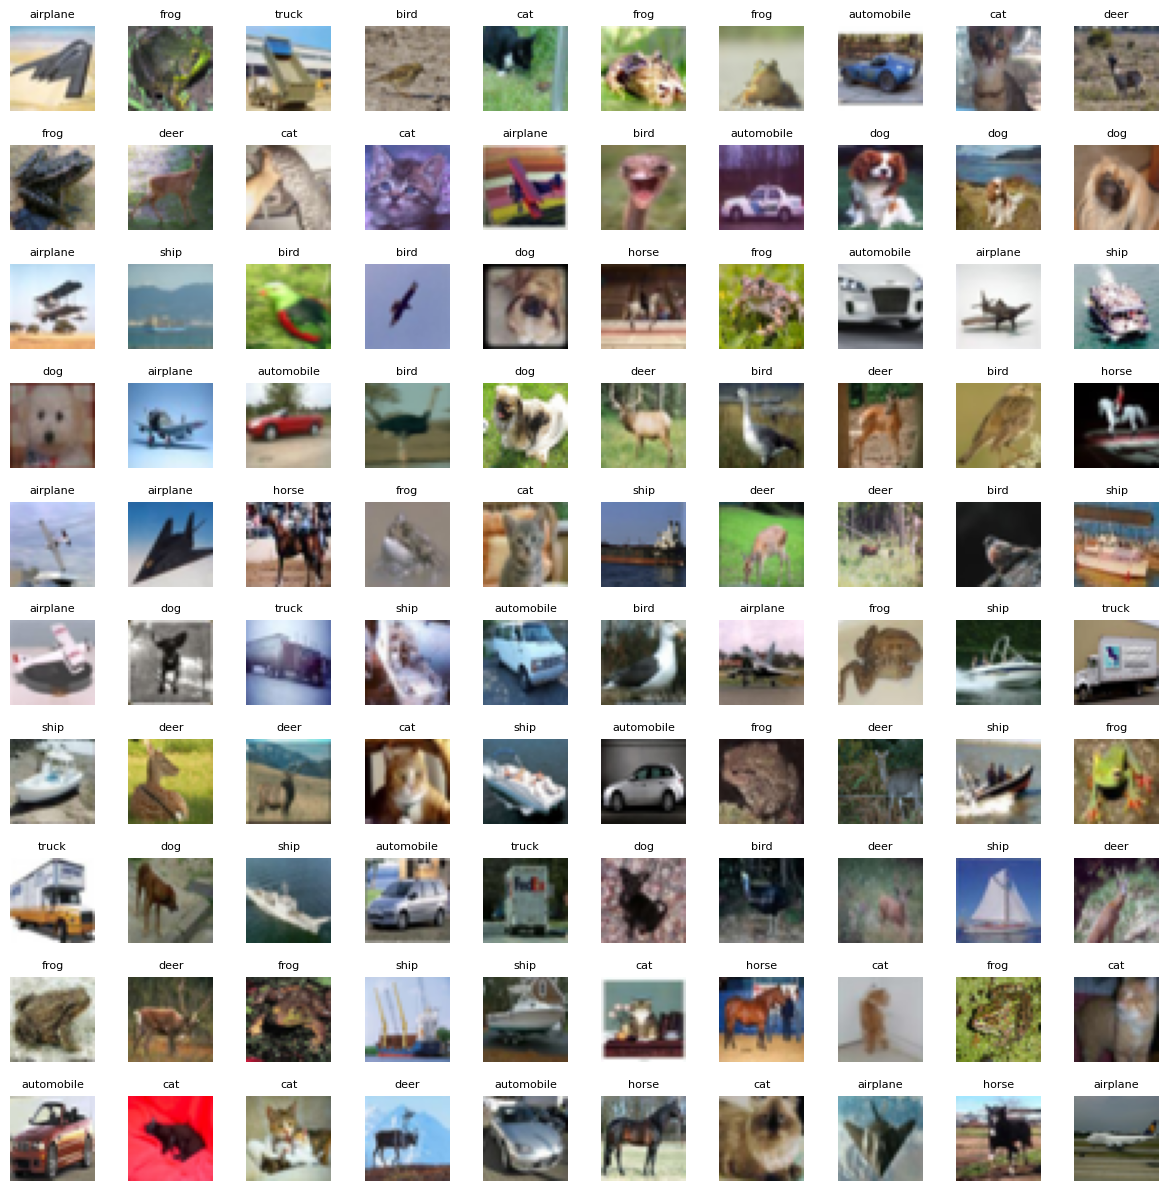

In [7]:
#classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
largura = 10
altura = 10
fig, axes = plt.subplots(altura, largura, figsize = (15,15))
axes = axes.ravel()
for i in np.arange(0, largura * altura):
    indice = np.random.randint(0, 50000) # Correct the upper bound for CIFAR-10
    axes[i].imshow(X_treinamento[indice], cmap = 'gray' )
    axes[i].set_title(classes[y_treinamento[indice][0]], fontsize = 8) # Access the scalar value
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

## Pré-processamento das imagens

In [8]:
X_treinamento = X_treinamento / 255
X_teste = X_teste / 255

In [9]:
X_treinamento.shape, X_teste.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [10]:
X_treinamento = X_treinamento.reshape((len(X_treinamento), 32, 32, 3))
X_teste = X_teste.reshape((len(X_teste), 32, 32, 3))

In [11]:
X_treinamento.shape, X_teste.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

## Construção e treinamento do autoencoder convolucional

In [17]:
# Padding: https://www.pico.net/kb/what-is-the-difference-between-same-and-valid-padding-in-tf-nn-max-pool-of-tensorflow

autoencoder = Sequential()

# Encoder
autoencoder.add(Conv2D(filters = 16,
                       kernel_size=(3,3),
                       activation='relu',
                       padding='valid',
                       input_shape=(32,32,3)))

autoencoder.add(MaxPooling2D(pool_size = (2,2)))


autoencoder.add(Conv2D(filters = 8,
                       kernel_size=(3,3),
                       activation='relu',
                       padding='same'))

autoencoder.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))


#autoencoder.summary()

# ÚLTIMA CAMADA DO ENCODER
autoencoder.add(Conv2D(filters = 8,
                       kernel_size=(3,3),
                       activation='relu',
                       padding='same',
                       strides=(2,2))) # Strides: NA LEITURA DA MATRIZ, PULA 2 COLUNAS!

autoencoder.add(Flatten())

#autoencoder.summary()

# Decoder
autoencoder.add(Reshape((4,4,8)))
#autoencoder.summary()
autoencoder.add(Conv2D(filters = 8, kernel_size=(3,3), activation='relu', padding = 'same'))
#autoencoder.summary()

# UTILIZA-SE O UpSampling2D PARA AUMENTAR A DIMENSIONALIDADE
autoencoder.add(UpSampling2D(size=(2,2)))
#autoencoder.summary()

autoencoder.add(Conv2D(filters = 8, kernel_size=(3,3), activation='relu', padding = 'same'))
autoencoder.add(UpSampling2D(size=(2,2)))

autoencoder.add(Conv2D(filters = 16, kernel_size=(3,3), activation='relu', padding='same'))
autoencoder.add(UpSampling2D(size=(2,2)))

autoencoder.add(Conv2D(filters=3, kernel_size=(3,3), activation='relu', padding='same'))
autoencoder.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_35 (Conv2D)              │ (None, 30, 30, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 15, 15, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (None, 15, 15, 8)      │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 8, 8, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 4, 4, 8)        │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_5 (Reshape)             │ (None, 4, 4, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 4, 4, 8)        │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_15 (UpSampling2D) │ (None, 8, 8, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_39 (Conv2D)              │ (None, 8, 8, 8)        │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_16 (UpSampling2D) │ (None, 16, 16, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_40 (Conv2D)              │ (None, 16, 16, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_17 (UpSampling2D) │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 32, 32, 3)      │           435 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,963 (19.39 KB)

 Trainable params: 4,963 (19.39 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Output = (Input - Filter + 1) / Stride

# Input: (28, 28, 1)
# Filter size: 3
# Output = (28 - 3 + 1) / 1 -> (26, 26, 16)

# UpSampling2D: (16, 16, 8)
# Filter size: 3
# Output = (16 - 3 + 1) / 1 -> (14, 14, 16)

In [ ]:
# Output = (Input - Filter + 1) / Stride

# Input: (32, 32, 3)
# Filter size: 3
# Output = (32 - 3 + 1) / 1 -> (30, 30, 16)

In [20]:
(32 - 3 + 1) / 1

30.0

In [ ]:
(16 - 3 + 1) / 1

14.0

In [ ]:
(28 - 3 + 1) / 1

26.0

In [ ]:
4 * 4 * 8

128

In [18]:
autoencoder.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [19]:
autoencoder.fit(X_treinamento, X_treinamento, epochs=100)

Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.3973 - loss: 0.7745
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.4292 - loss: 0.6018
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4772 - loss: 0.6002
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.4498 - loss: 0.5958
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.4128 - loss: 0.5997
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4398 - loss: 0.5930
Epoch 7/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.4565 - loss: 0.5885
Epoch 8/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3940 - loss: 0.6225
Epoch 9/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.4455 - loss: 0.6082
Epoch 10/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.4618 - loss: 0.5943
Epoch 11/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.4298 - loss: 0.6009
Epoch 12/10

## Codificação e decodificação das imagens de teste

In [21]:
autoencoder.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_35 (Conv2D)              │ (None, 30, 30, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 15, 15, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (None, 15, 15, 8)      │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 8, 8, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 4, 4, 8)        │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_5 (Reshape)             │ (None, 4, 4, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 4, 4, 8)        │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_15 (UpSampling2D) │ (None, 8, 8, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_39 (Conv2D)              │ (None, 8, 8, 8)        │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_16 (UpSampling2D) │ (None, 16, 16, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_40 (Conv2D)              │ (None, 16, 16, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_17 (UpSampling2D) │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 32, 32, 3)      │           435 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,891 (58.17 KB)

 Trainable params: 4,963 (19.39 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9,928 (38.79 KB)

In [24]:
autoencoder.get_layer('conv2d_35').input

<KerasTensor shape=(None, 32, 32, 3), dtype=float32, sparse=False, ragged=False, name=keras_tensor_530>

In [25]:
encoder = Model(inputs = autoencoder.get_layer('conv2d_35').input,
                outputs = autoencoder.get_layer('flatten_5').output)

encoder.summary()

Model: "functional_84"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 30, 30, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 15, 15, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (None, 15, 15, 8)      │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 8, 8, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 4, 4, 8)        │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 128)            │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,192 (8.56 KB)

 Trainable params: 2,192 (8.56 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
imagens_teste_codificadas = encoder.predict(X_teste)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [27]:
imagens_teste_codificadas.shape

(10000, 128)

In [28]:
imagens_teste_codificadas[0]

array([0.21086538, 0.02608876, 0.01488216, 0.2828824 , 0.        ,
       0.16524336, 0.        , 0.28735065, 0.23789378, 0.        ,
       0.04459804, 0.29137456, 0.        , 0.22969802, 0.        ,
       0.29947874, 0.23894402, 0.09175132, 0.1605093 , 0.21762222,
       0.        , 0.15197988, 0.        , 0.2803548 , 0.20460713,
       0.0409482 , 0.07372419, 0.2032997 , 0.12946498, 0.13521376,
       0.        , 0.29229963, 0.3047223 , 0.06680688, 0.17667037,
       0.25437668, 0.        , 0.22247693, 0.        , 0.27344227,
       0.32441854, 0.        , 0.22821182, 0.23253179, 0.        ,
       0.24150902, 0.        , 0.37771362, 0.20488912, 0.08323307,
       0.28624678, 0.18064737, 0.        , 0.2325224 , 0.        ,
       0.31410217, 0.22977053, 0.13194013, 0.18982072, 0.17022139,
       0.0631322 , 0.15302874, 0.        , 0.21151584, 0.41045657,
       0.089886  , 0.30398506, 0.24160597, 0.        , 0.19408897,
       0.        , 0.33454597, 0.32122424, 0.08026613, 0.30372

In [29]:
imagens_teste_decodificadas = autoencoder.predict(X_teste) # DECODIFICAÇÃO DA IMAGEM

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


In [30]:
imagens_teste_decodificadas.shape

(10000, 32, 32, 3)

In [31]:
16 * 8

128

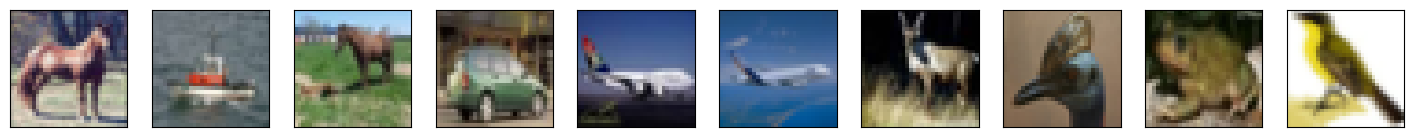

In [34]:
numero_imagens = 10
imagens_teste = np.random.randint(0, 10000, size = numero_imagens)
plt.figure(figsize=(18,18))
for i, imagem_indice in enumerate(imagens_teste):
  # Imagem original
  ax = plt.subplot(10,10, i+1)
  plt.imshow(X_teste[imagem_indice].reshape(32,32,3), cmap='gray')
  plt.xticks(())
  plt.yticks(())

([], [])

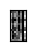

In [35]:
  # Imagens codificadas
  ax = plt.subplot(10,10, i+1+numero_imagens)
  plt.imshow(imagens_teste_codificadas[imagem_indice].reshape(16,8), cmap='gray')
  plt.xticks(())
  plt.yticks(())

([], [])

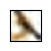

In [37]:
  # Imagens decodificadas
  ax = plt.subplot(10,10, i+1+numero_imagens*2)
  plt.imshow(imagens_teste_decodificadas[imagem_indice].reshape(32,32,3), cmap='gray')
  plt.xticks(())
  plt.yticks(())